In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# Tight Binding Model for Graphene
---
$$H = - t\sum_{\langle i j\rangle}a_i^{\dagger}b_j + b_j^\dagger a_i$$
Where the $\langle \cdots \rangle$ means the nearest neighbours.
Going into the momentum space,
$$H = -t \sum_{\langle \vec r_i \vec r_j \rangle\vec k_1\vec k_2}a_{\vec k_1}^\dagger b_{\vec k_2}e^{i\vec r_i \vec k_1 - i\vec r_j \vec k_2 } + b_{\vec k_2}^\dagger a_{\vec k_1}e^{i\vec r_j \vec k_2 - i\vec r_i \vec k_1 }$$
Noting that $r_i$  and $r_j$ are the nearest neighbours, we write $\vec r_j = \vec r_i + \vec \delta_i$ . The sum then becomes,
$$
    H = -t \sum_{\vec r_i \vec \delta _i \vec k_1\vec k_2}a_{\vec k_1}^\dagger b_{\vec k_2}e^{i\vec r_i (\vec k_1 - \vec k_2 ) - i \vec \delta_i \vec k_2} + b_{\vec k_2}^\dagger a_{\vec k_1}e^{i\vec r_i (\vec k_2 - \vec k_1) +i\vec \delta_i \vec k_2 }
$$
Carrying out the sum over $\vec r_i$ we get the delta function $\delta(\vec k_1 - \vec k_2)$, using this to kill one of the momentum integration and writing the other momentum as $\vec k$ we get,
$$
    H = -t \sum_{\vec \delta _i \vec k}a_{\vec k}^\dagger b_{\vec k}e^{i\vec \delta_i \vec k} + b_{\vec k}^\dagger a_{\vec k}e^{-i\vec \delta_i \vec k}
$$

Writing this in the basis, $\psi_k = (a_k \; b_k)^T$
$$
    H = -t \sum_{\vec k} \psi^\dagger_{\vec k} \begin{pmatrix} 0 & \sum_{\vec \delta_i}e^{i\vec \delta_i \vec k} \\ \sum_{\vec \delta_i}e^{-i\vec \delta_i \vec k} & 0 \end{pmatrix} \psi_{\vec k}  = -\sum_{\vec k} \psi_k^\dagger \begin{pmatrix}0 & tS(\vec k) \\ tS^{*}(\vec k) & 0\end{pmatrix}\psi 
$$

Diagonalising the matrix, we can find the two energy bands

$$
    \epsilon = \pm t|S(\vec k)| = \pm t \sqrt{3 + 4\cos(3ak_x/2)\cos(\sqrt{3}ak_y/2) + 2\cos(\sqrt{3}ak_y)}
$$
where we have used the nearest neighbours at  $\delta_1 = \frac{a}{2}(1,\sqrt{3})$, $\delta_2 = \frac{a}{2}(1, -\sqrt{3})$ and $\delta_3 = a(-1,0)$ with $a$ being the lattice spacing.

In [4]:
def energy(kx,ky,a,t):
    return -t*np.sqrt(3+4*np.cos(3*a*kx/2)*np.cos(np.sqrt(3)*a*ky/2) + 2*np.cos(np.sqrt(3)*a*ky))

In [5]:
def plot_band_structure(energy,a,t):
    kx = np.arange(-np.pi/a,np.pi/a,0.01)
    ky = np.arange(-np.pi/a,np.pi/a,0.01)
    KX,KY = np.meshgrid(kx,ky)

    En = energy(KX,KY,a,t)

    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    ax1.plot_surface(KX,KY,En,cmap=cm.coolwarm)
    ax1.plot_surface(KX,KY,-En, cmap=cm.coolwarm_r)
    ax1.set(title="Band Structure of Graphene", xlabel='kx', ylabel='ky', zlabel='E')

    ax2.contourf(KX,KY,En,20,cmap=cm.coolwarm)
    ax2.set(xlabel="kx",ylabel="ky")

    plt.show()

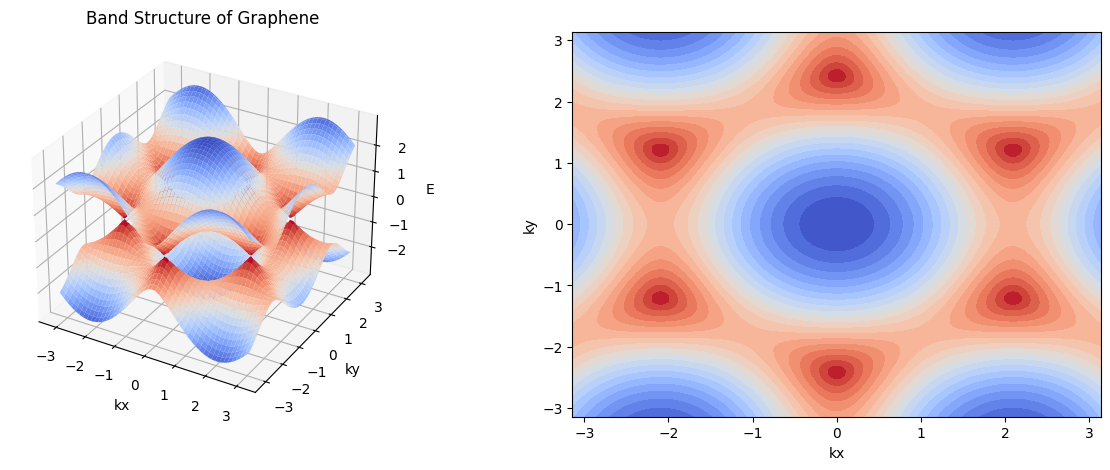

In [6]:
plot_band_structure(energy,1,1)

## Dirac Points

The two bands touches each other at some special points in momentum space, known as the Dirac points. Two independent such points are $K = \frac{2\pi}{3\sqrt{3}a}(\sqrt{3},-1)$ and $K' = \frac{2\pi}{3\sqrt{3}a}(\sqrt{3},1)$. The energy dispersion near those points are shown below.

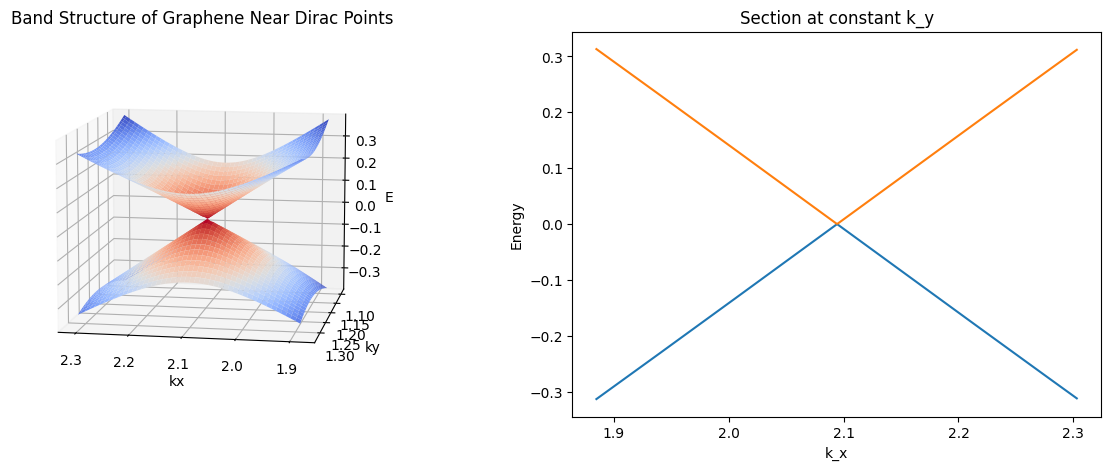

In [18]:
def band_Dirac_points(energy,a,t):
    delta = 0.1
    kx = np.arange(2*np.pi*(1 - delta)/3*a, 2*np.pi*(1+delta)/3*a,0.001) 
    ky = np.arange(2*np.pi*(1 - delta)/(3*np.sqrt(3)*a), 2*np.pi*(1+delta)/(3*np.sqrt(3)*a),0.01) 
    KX,KY = np.meshgrid(kx,ky)

    En = energy(KX,KY,a,t)

    En_kx = np.vectorize(lambda kx: energy(kx,2*np.pi/(3*np.sqrt(3)*a),1,1))(kx)

    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    ax1.view_init(elev=10., azim=100)
    ax1.plot_surface(KX,KY,En,cmap=cm.coolwarm)
    ax1.plot_surface(KX,KY,-En, cmap=cm.coolwarm_r)
    ax1.set(title="Band Structure of Graphene Near Dirac Points", xlabel='kx', ylabel='ky', zlabel='E')

    ax2.plot(kx,En_kx)
    ax2.plot(kx,-En_kx)
    ax2.set(title="Section at constant k_y",xlabel="k_x",ylabel="Energy")

    plt.show()

band_Dirac_points(energy,1,1)


### Effect of hopping parameter

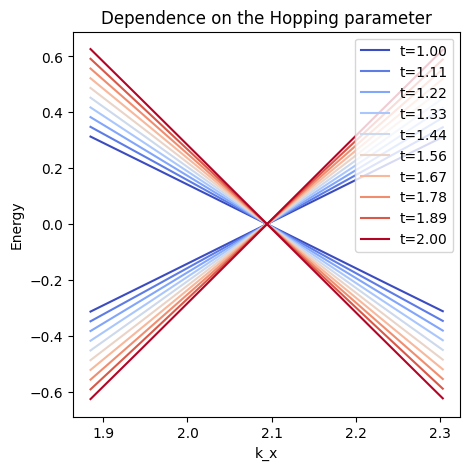

In [44]:
def band_t(energy, a, trange):
    delta = 0.1
    kx = np.arange(2*np.pi*(1 - delta)/3*a, 2*np.pi*(1+delta)/3*a, 0.001) 
    ky = np.arange(2*np.pi*(1 - delta)/(3*np.sqrt(3)*a), 2*np.pi*(1+delta)/(3*np.sqrt(3)*a), 0.01) 

    fig = plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(111)

    for t in trange:
        En_kx = np.vectorize(lambda kx: energy(kx, 2*np.pi/(3*np.sqrt(3)*a), 1, t))(kx)
        color = cm.coolwarm((t - trange[0])/(trange[-1] - trange[0]))
        ax1.plot(kx, En_kx, color=color, label=f"t={t:.2f}")
        ax1.plot(kx, -En_kx, color=color)
        
    ax1.set(title="Dependence on the Hopping parameter",xlabel="k_x", ylabel="Energy")
    ax1.legend()
    plt.show()

band_t(energy, 1, np.linspace(1, 2, 10))
